In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

# idealnya cek data yang banyak muncul, lalu buang stopwords tsb
sw_indo = stopwords.words("indonesian") + list(punctuation)

In [2]:
# case = masukin berita terus keluar keyword apa saja yang penting (keyword extraction)
# bisa dipakai sentimen, misal dalam hari ini, berita banyak omongin apa? gausa baca berita, tapi liat saja keywordnya
# dokumen similarity, ada novel bisa dicari similarity dengan novel yang lain, manfaatnya untuk rekomendasi sistem, 
"""
kalo niken suka film A, gada sinopsis, yaudah cari sinopsis yang mirip pake dokumen similarity itu 
hasilnya dijadiin rekomendasi sistem
"""

'\nkalo niken suka film A, gada sinopsis, yaudah cari sinopsis yang mirip pake dokumen similarity itu \nhasilnya dijadiin rekomendasi sistem\n'

## Import Data

In [4]:
df = pd.read_csv("data/kompas.csv")
df.head()

,teks
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK..."
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju..."


In [5]:
df.shape

(2008, 1)

=> bisa ga extract keyword atau cari kesamaan dari berita tersebut?
bisa

data text diencode dahulu ke tempat yang isinya beberapa dimensi angka (diposisikan ke tempat2 tertentu di berapa dimensi tersebut), yang dilakukan adalah kalau cari similarity dari tf idf, otomatis dapet similarity dari dokumen, tinggal cari angka yang mirip di tempat dimensi lalu akan terepresentasikan dikenyataannya beritanya akan mirip, idenya adalah similariry di tf idf harapannya bisa ekuivalen dengan similarity berita

- encode dulu pakai tf idf cari encode mirip, lalu baru balikin lagi jadi berita
- encode pakai tf idf, kemudian akan mencari similarity dengan tfidf, kalo udh nemu lalu cari beritanya yang mirip yang mana

logikanya: misal nih di dokumen 1 sama di dokumen 5 nilai tfidf nya sama, berarti ada kemungkinan bahwa data tersebut mirip

In [6]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [7]:
#tokenizer jangan pakai scikit learn, pakai saja nltk
tfidf = TfidfVectorizer(ngram_range=(1,2), tokenizer=word_tokenize, stop_words=sw_indo)

In [8]:
tfidf_matrix = tfidf.fit_transform(df.teks)

C:\Users\Niken Amelia\miniconda3\envs\jcop_ud\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# TFIDF Similarity -> Document Similarity
#### kemiripan fitur ekuivalen dengan kemiripan dokumen, karena encode nya

kalimat kan sudah dijadikan vektor, nah vektor tersebut sudah ada posisinya masing2 didimensi tersebut. karna dalam studi kasus ini vektornya mengikuti jumlah vocab => multidimensional, tinggal cari similarity nya, maka dapat 

##### 1. menggunakan teknik cara cosine similarity.

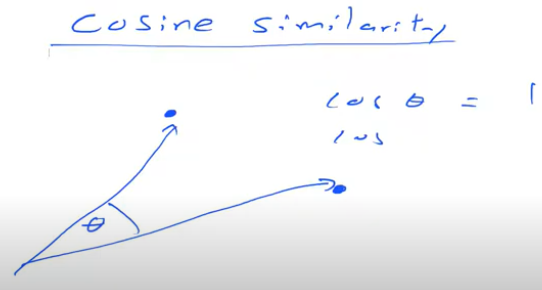

- misalkan lokasi titik tf-idf tersebar di beberapa bagian, kedua titik tersebut kan vektor, lalu lihat sudutnya, kalau sudutnya kecil deketan dianggap dok mirip, kalo sudutnya bersebrangan (satu depan, satu belakang) artinya itu bertolak belakang/tidak ada kemiripan. kemudian tinggal hitung cosinus dari  teta, karna cos 0 = 1, cosinus teta = nilai sudutnya.

- itulah kenapa namanya cosinus similarity, otomatis hitung sudutnya, mendekati 1 sangat mirip, negatif bertolak belakang


##### 2. bisa menggunakan perhitungan distance knn, top 10 yang paling dekat dianggap dokumen mirip

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
# cara hitungnya masukin a dan b nanti akan dihitung similaritynya

# tf-idf pertama (dokumen ke-0(komentar 1)) dengan tf-idf keseluruhan
# kemiripan tf idf harapannya ekuivalen dengan kemiripan dokumen

sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix)
sim

#=====
# dokumen ke 0 mirip dengan dokumen ke 0, ya jelas mirip karna memang persis sama dokumennya.
# ambil yang mirip tapi bukan dia sendiri

array([[1.        , 0.00858328, 0.01060043, ..., 0.00856287, 0.00677808,
        0.01513341]])

selanjutnya tinggal sorting. 
- sorting jangan pakai sort (karna kalau sort doang langsung dapat yang kecil berapa, yang besar berapa) (bukan ini yang diinginkan tetapi indexnya yang diinginkan), 
- yang dimau indexnya yang di sort (siapa indexnya, yang ditampilin posisi indexnya) bukan valuenya, dokumen berapa yang paling kecil atau besar

In [10]:
sim.argsort()

# dimulai dari paling ga mirip, sampai yang paling similar, yang paling similar dokumen ke-0 ya jelas

array([[ 932, 1131, 1593, ...,  215,  144,    0]], dtype=int64)

In [13]:
df.teks[0][:200] # kalo [0][:] = akan menampilkan semua beritanya, 200 itu dibatasi jumlah kata yang munculnya

'Ginandjar Tetap Ditahan. Jaksa Agung Dilaporkan ke Polri\nKejaksaan Agung memutuskan untuk tetap menahan tersangka kasus korupsi, Ginandjar Kartasasmita, sampai batas waktu yang ditentukan KUHAP. Sedan'

In [14]:
df.teks[144][:200]

'Kejaksaan Agung Terbitkan Surat Penahanan Baru\nKejaksaan Agung (Kejagung) akhirnya menerbitkan surat perintah penahanan yang baru terhadap mantan Menteri Pertambangan dan Energi Ginandjar Kartasasmita'

In [15]:
df.teks[215][:200]

'Kuasa Hukum Ginandjar Bertahan di Rutan\nSejumlah kuasa hukum Ginandjar Kartasasmita hingga hari Selasa (17/4) pukul 22.00 masih bertahan di ruang tahanan (rutan) Kejaksaan Agung (Kejagung). Selasa pag'

In [16]:
df.teks[932][:200]

'Pusat Pengolahan Ikan Asin Lhokseumawe Terbakar\nPusat pengolahan ikan asin di kawasan Pasar Ikan Lhokseumawe (Aceh) terbakar bersama berton-ton stok ikan asin Sabtu (13/1) siang. Sedikitnya 25 gudang '

# Keyword Extraction

- tf-idf sudah ngebobotin kata2 yang spesifik akan dibobotin kuat
- tf-idf fokus ke keyword, jadi tinggal di sorting

In [18]:
vocab = tfidf.get_feature_names()
vocab[-10:]

['zuniga memilih',
 'zunnatul',
 'zunnatul mafruhah',
 'zurich',
 'zurich northholt',
 'zw',
 'zw suparman',
 'zw tim',
 'zx',
 'zx diserbu']

##### keyword extraction tidak ada hubungannya dengan dokumen lain, oleh karena itu diproses per dokumen, proses dibawah adalah khusus untuk dokumen berita 1

In [19]:
# cara ambil hanya dokumen 1

# convert jadi array dulu, perhatikan array nya 2 dimensi, oleh karna itu harus specify, arti toarray()[0] = untuk ambil vektornya
# vocab ke 0 tf idf nya 0.02115058
tfidf_matrix[0].toarray()[0] #karena merupakan matrik 2 dimensi oleh karena itu tambahin ada 0 dibelakang karena yang diambil hanya vektor

array([[0.02115058, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

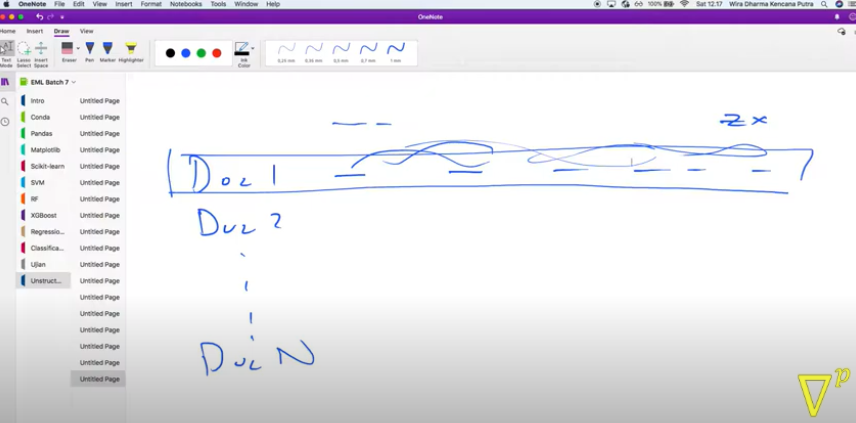

In [21]:
# toarray()[0] artinya tambahin si dimensi vektor baru di sort
sorted_tfidf = tfidf_matrix[0].toarray()[0].argsort() # disort setiap vektor vocab pada setiap dokumen
sorted_tfidf

# top-10 paling tinggal merupakan keywordnya

array([274201, 365453, 365452, ..., 386361, 436633, 169209], dtype=int64)

In [22]:
vocab[169209]

'ginandjar'

In [23]:
vocab[436633]

'putusan'

In [24]:
"""
untuk setiap sorted tf-idf, diambil 10 dari belakang, kemudian ubah jadi vocab
"""
[vocab[idx] for idx in reversed(sorted_tfidf[-10:])]

['ginandjar',
 'putusan',
 'penahanan',
 'hukum ginandjar',
 'kuasa hukum',
 'rusman',
 'kejaksaan',
 'hakim rusman',
 'kuasa',
 '9 april']

##### dibungkus menjadi 1 fungsi

In [25]:
def extract_keywords_tfidf(doc, tfidf, topk=10):
    matrix = tfidf.transform([doc])
    vocab = tfidf.get_feature_names()
    
    sorted_tfidf = matrix[0].toarray()[0].argsort()
    return [vocab[idx] for idx in reversed(sorted_tfidf[-topk:])]

In [27]:
extract_keywords_tfidf(df.teks[3],tfidf)

['pos',
 'gaji',
 'pos indonesia',
 'pt pos',
 'pegawai',
 'pegawai pos',
 'dibayarkan',
 'kenaikan',
 'keterangan tertulis',
 'bonus']